In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "/Users/t866229/input/prophet/COST_5yr.csv"
data = pd.read_csv(filename) 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,141.350006,141.500000,137.710007,139.449997,127.102798,3317600
1,2015-07-10,141.710007,143.429993,141.169998,142.720001,130.083267,2846000
2,2015-07-13,143.860001,145.070007,143.500000,144.059998,131.304596,1847800
3,2015-07-14,143.649994,144.289993,143.160004,143.929993,131.186081,1512800
4,2015-07-15,143.929993,144.179993,142.919998,143.630005,130.912659,1306700


In [26]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,204.418443,206.063288,202.774639,204.523010,198.125026,2.494613e+06
std,55.281112,55.920324,54.702078,55.331045,59.161983,1.502531e+06
min,131.970001,137.160004,117.029999,132.710007,121.292099,4.910000e+05
25%,157.869995,158.900002,156.794998,157.739998,148.002174,1.672850e+06
50%,185.750000,187.250000,183.500000,185.690002,181.597305,2.142000e+06
75%,242.159996,244.025001,240.760002,241.934998,239.191780,2.817400e+06
max,322.559998,325.260010,321.730011,324.079987,323.341248,2.423300e+07


In [27]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-07-09,139.449997
1,2015-07-10,142.720001
2,2015-07-13,144.059998
3,2015-07-14,143.929993
4,2015-07-15,143.630005


In [28]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

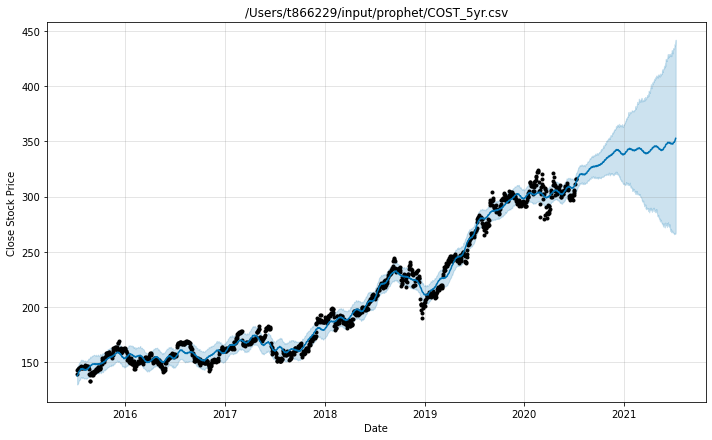

In [29]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

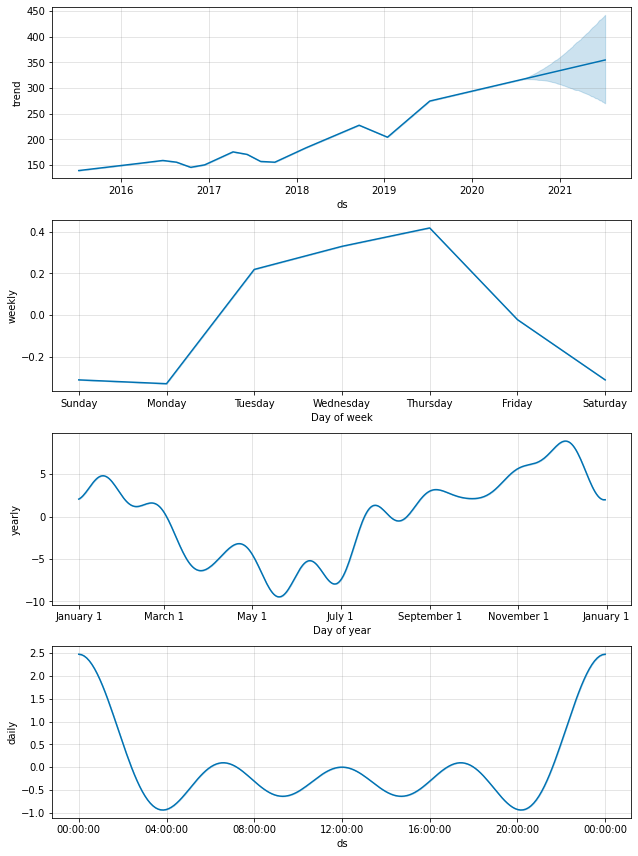

In [30]:
m.plot_components(prediction)
plt.show()